# Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv', index_col='id')

# Data Visualisation

In [3]:
train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51012 entries, 76518 to 127529
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  51012 non-null  int64  
 1   Application mode                                51012 non-null  int64  
 2   Application order                               51012 non-null  int64  
 3   Course                                          51012 non-null  int64  
 4   Daytime/evening attendance                      51012 non-null  int64  
 5   Previous qualification                          51012 non-null  int64  
 6   Previous qualification (grade)                  51012 non-null  float64
 7   Nacionality                                     51012 non-null  int64  
 8   Mother's qualification                          51012 non-null  int64  
 9   Father's qualification                 

In [6]:
train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [7]:
train.isnull().sum().sum()

0

In [8]:
test.isnull().sum().sum()

0

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
train.shape

(76518, 37)

In [12]:
test.shape

(51012, 36)

# Data analysis





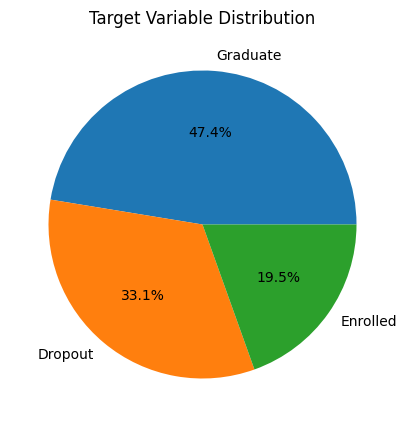

In [13]:
# Calculate the target varaible

tagert_count = train["Target"].value_counts()

# Plot the pie
plt.figure(figsize=(5, 5))
plt.pie(tagert_count, labels=tagert_count.index, autopct='%1.1f%%')
plt.title("Target Variable Distribution")
plt.show()


In [14]:
le = LabelEncoder()
train['Target'] = le.fit_transform(train['Target'])

## Distribution of all varaibles

In [15]:
cat_features = ['Marital status', 'Application mode', 'Course',
                'Previous qualification', 'Nacionality', "Mother's qualification",
                "Father's qualification", "Mother's occupation",
                "Father's occupation"]
for feature in cat_features:

    categories_train = train[feature].dropna().unique()
    categories_test = test[feature].dropna().unique()


    all_categories = list(set(categories_train) | set(categories_test))


    dtype = pd.CategoricalDtype(categories=all_categories, ordered=False)
    train[feature] = train[feature].astype(dtype)
    test[feature] = test[feature].astype(dtype)

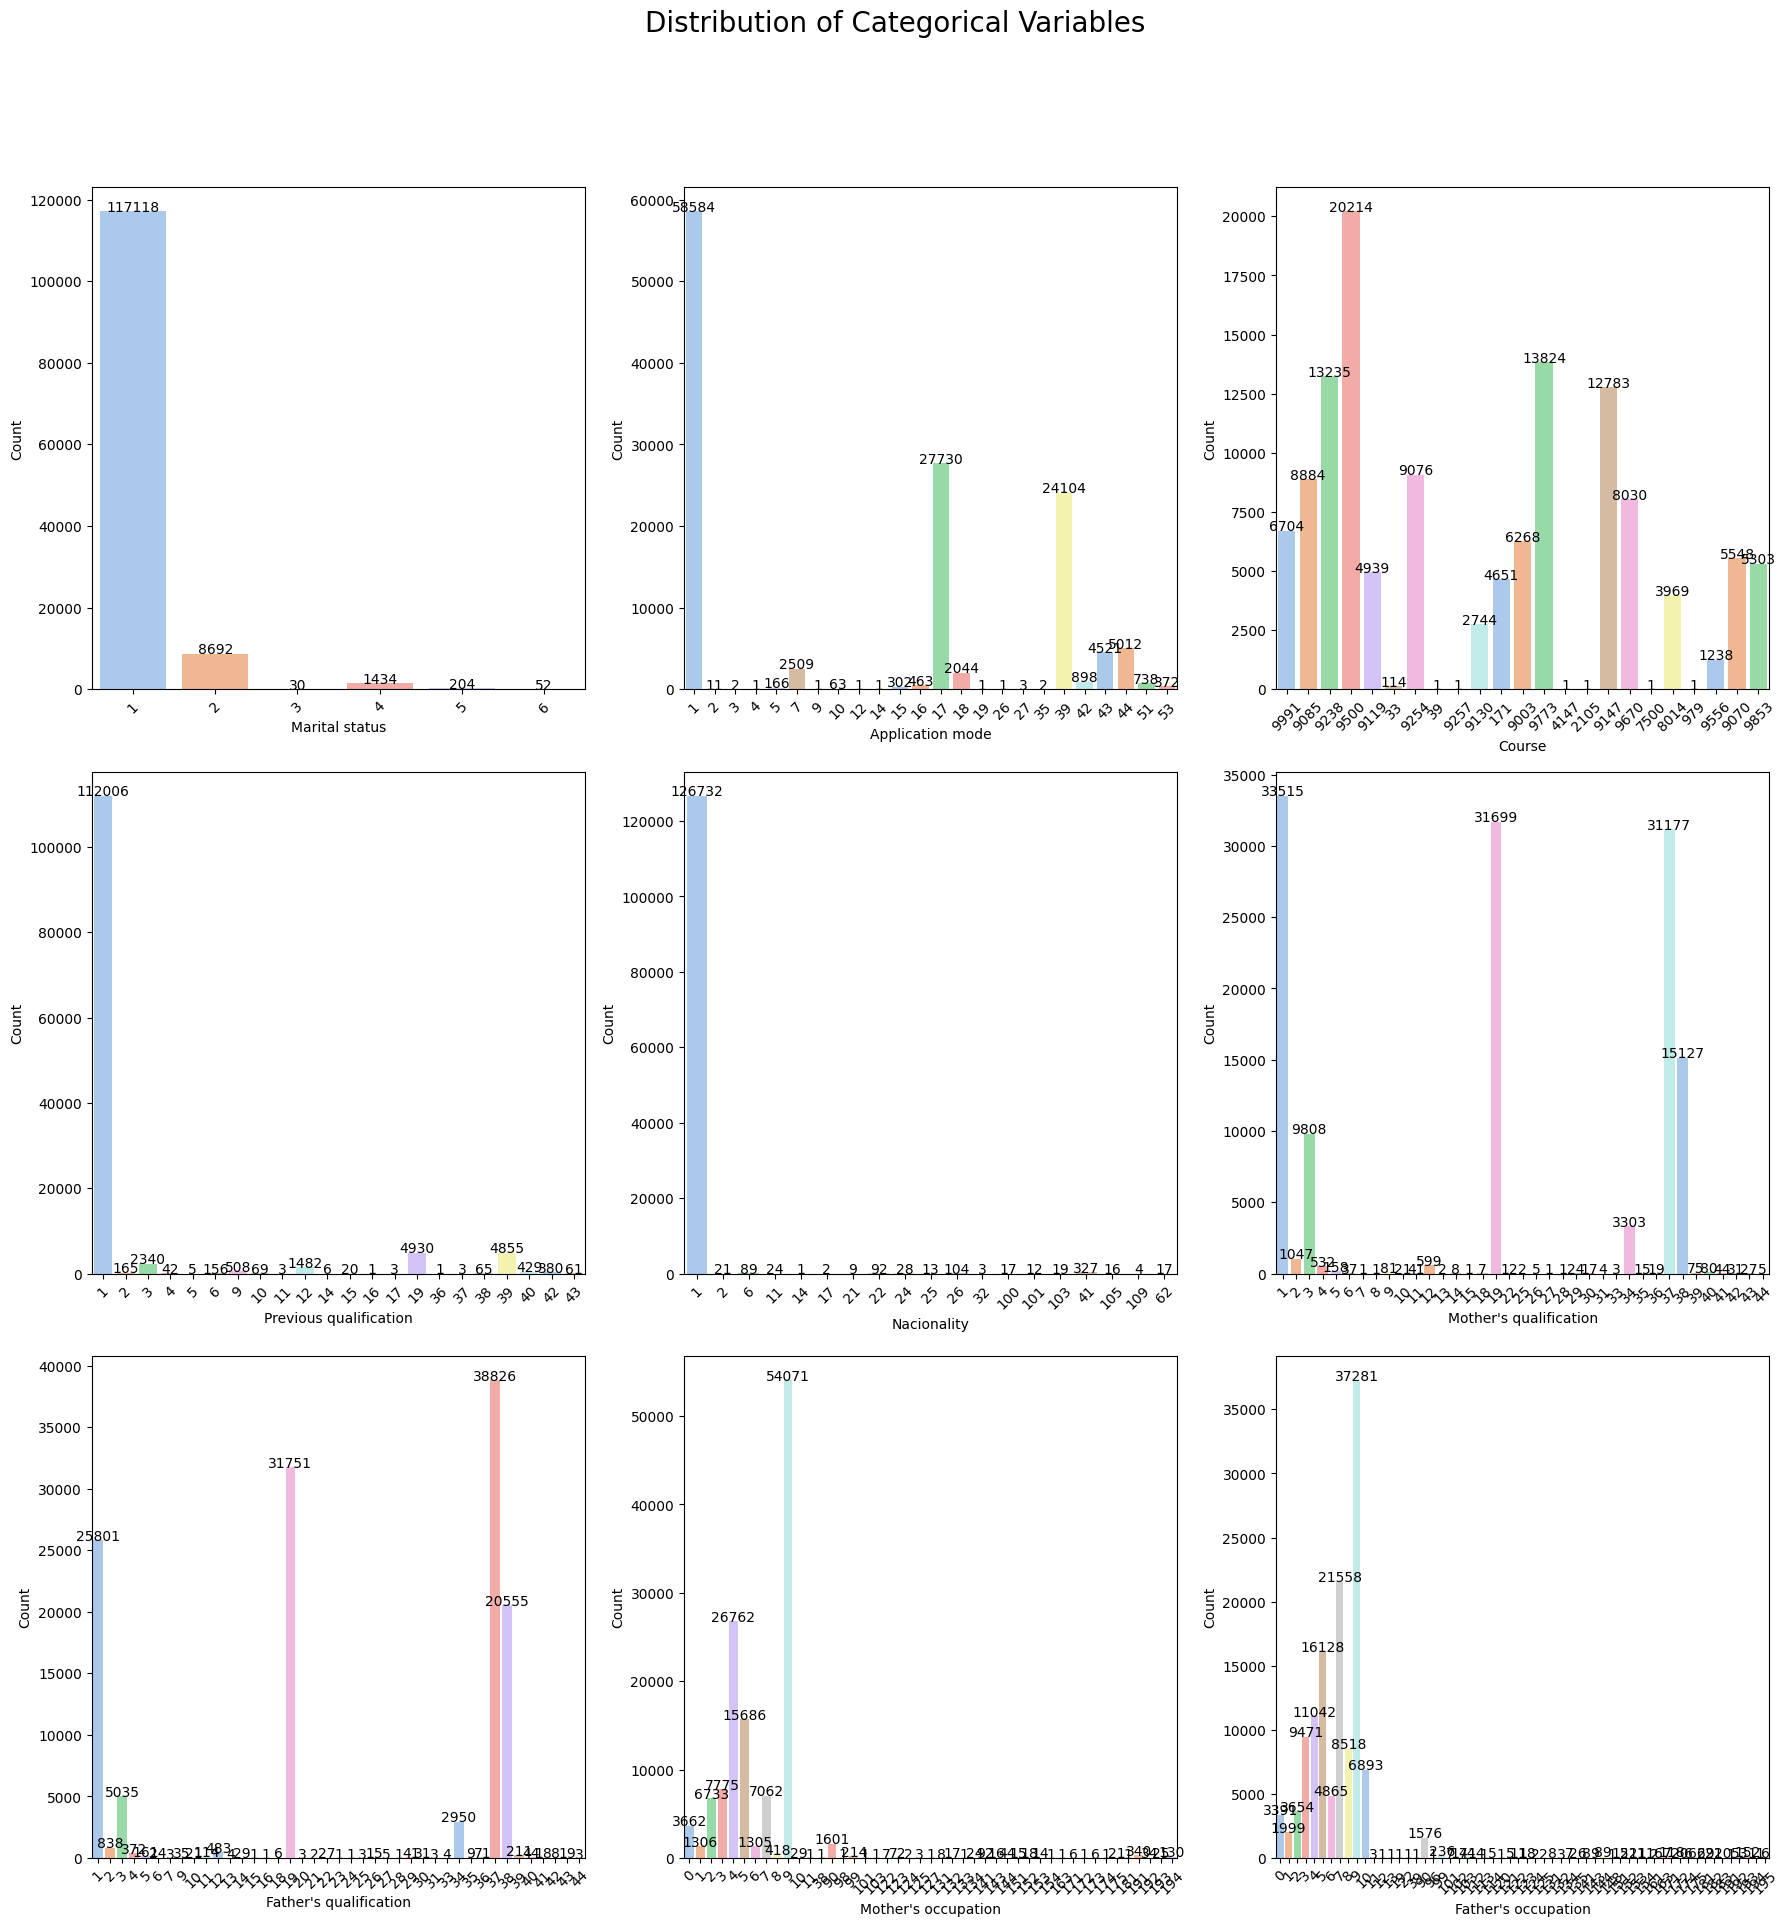

In [16]:
plt.figure(figsize=(18, 24))
plotnumber = 1

for col in cat_features:
    if plotnumber <= len(cat_features):
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=col, data=pd.concat([train, test]), palette='pastel', ax=ax)

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")

        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.ylabel('Count')

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [17]:
# Define integer columns, excluding the target variable
int_col_train = [col for col in train.columns if train[col].dtype.name == 'int64' and col != 'Target']
int_col_test = [col for col in test.columns if test[col].dtype.name == 'int64' and col != 'Target']

# Combine the integer comlumns
combined_int_cols = list(set(int_col_train) | set(int_col_test))

# Define float columns
float_col_train = [col for col in train.columns if train[col].dtype.name == 'float64']
float_col_test = [col for col in test.columns if test[col].dtype.name == 'float64']

# Combine the float columns
combined_float_cols = list(set(float_col_train) | set(float_col_test))

# Select the relevant columns from train and test DataFrames
selected_train_data = train[combined_int_cols + combined_float_cols + [feature]]
selected_test_data = test[combined_int_cols + combined_float_cols + [feature]]

# Combine the selected data into a single DataFrame
all_train = pd.concat([selected_train_data, selected_test_data])


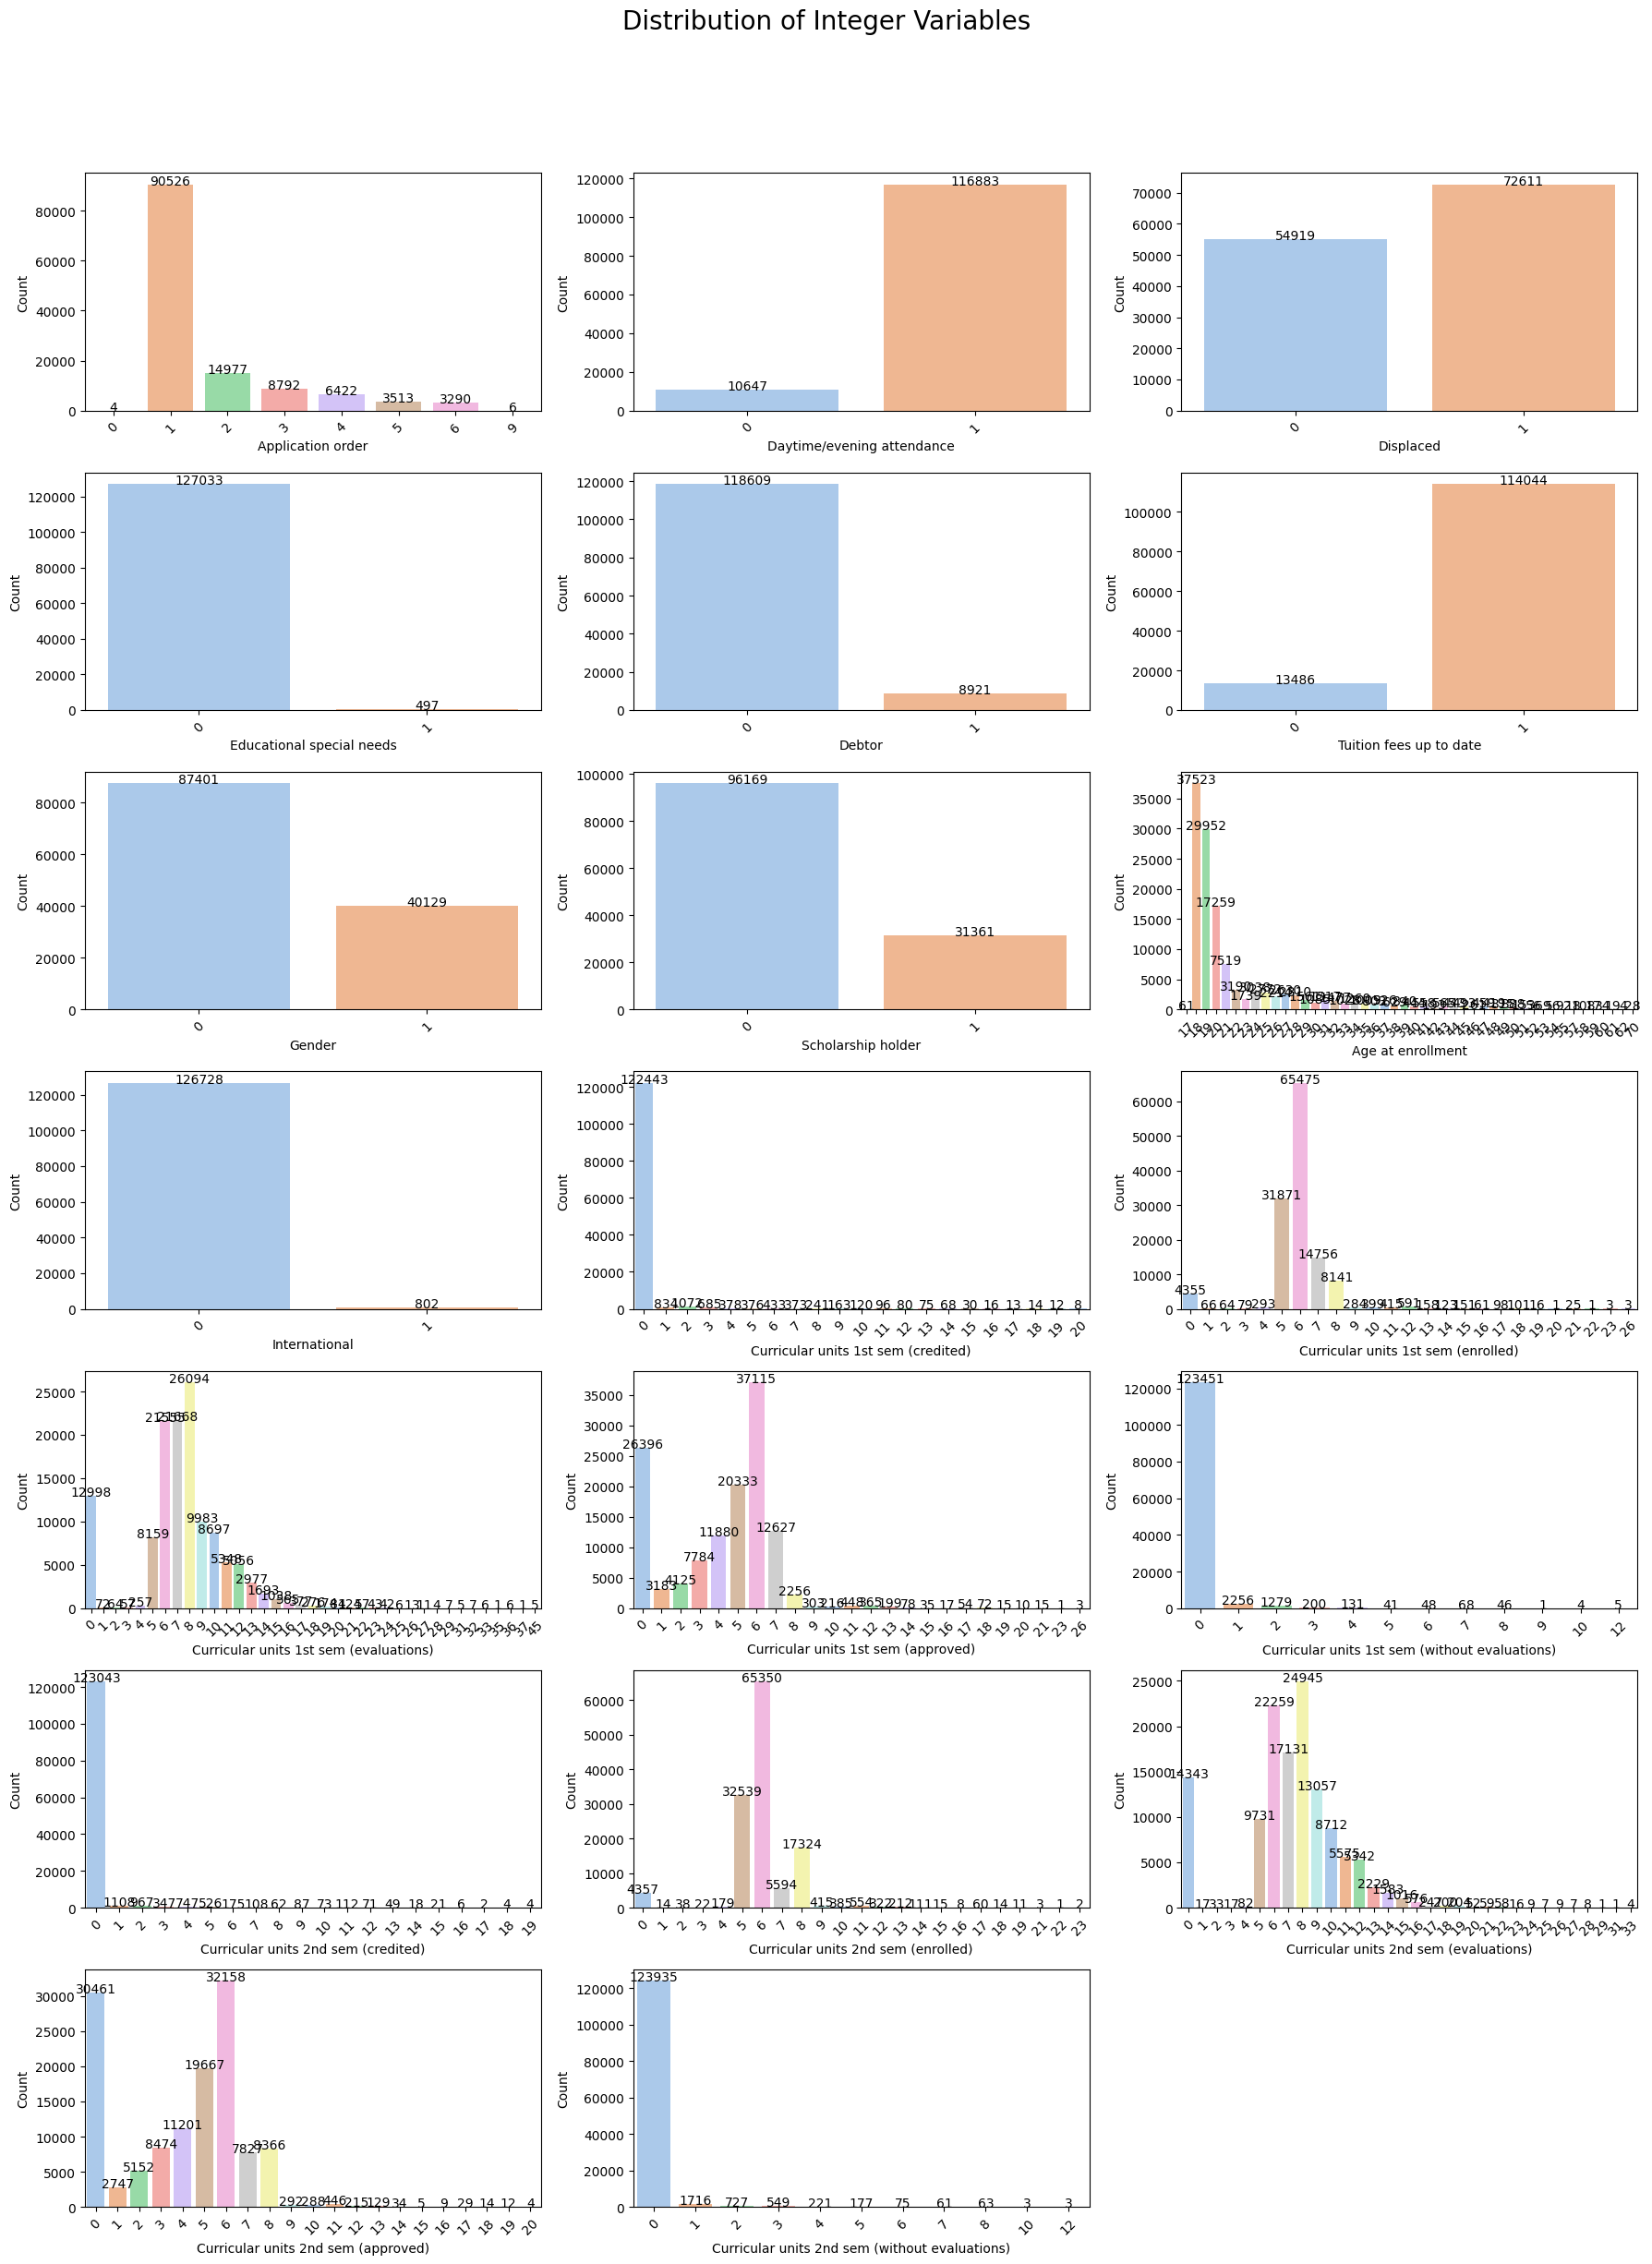

In [18]:
plt.figure(figsize=(18, 24))
plotnumber = 1

# Calculate the number of rows needed based on the number of columns
num_rows = (len(combined_int_cols) + 2) // 3

for col in int_col_train:
    if plotnumber <= len(combined_int_cols):
        ax = plt.subplot(num_rows, 3, plotnumber) #Dynamically adjust number of rows
        sns.countplot(x=col, data=pd.concat([train, test]), palette='pastel', ax=ax)

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")

        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.ylabel('Count')

        plotnumber += 1

plt.suptitle('Distribution of Integer Variables', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

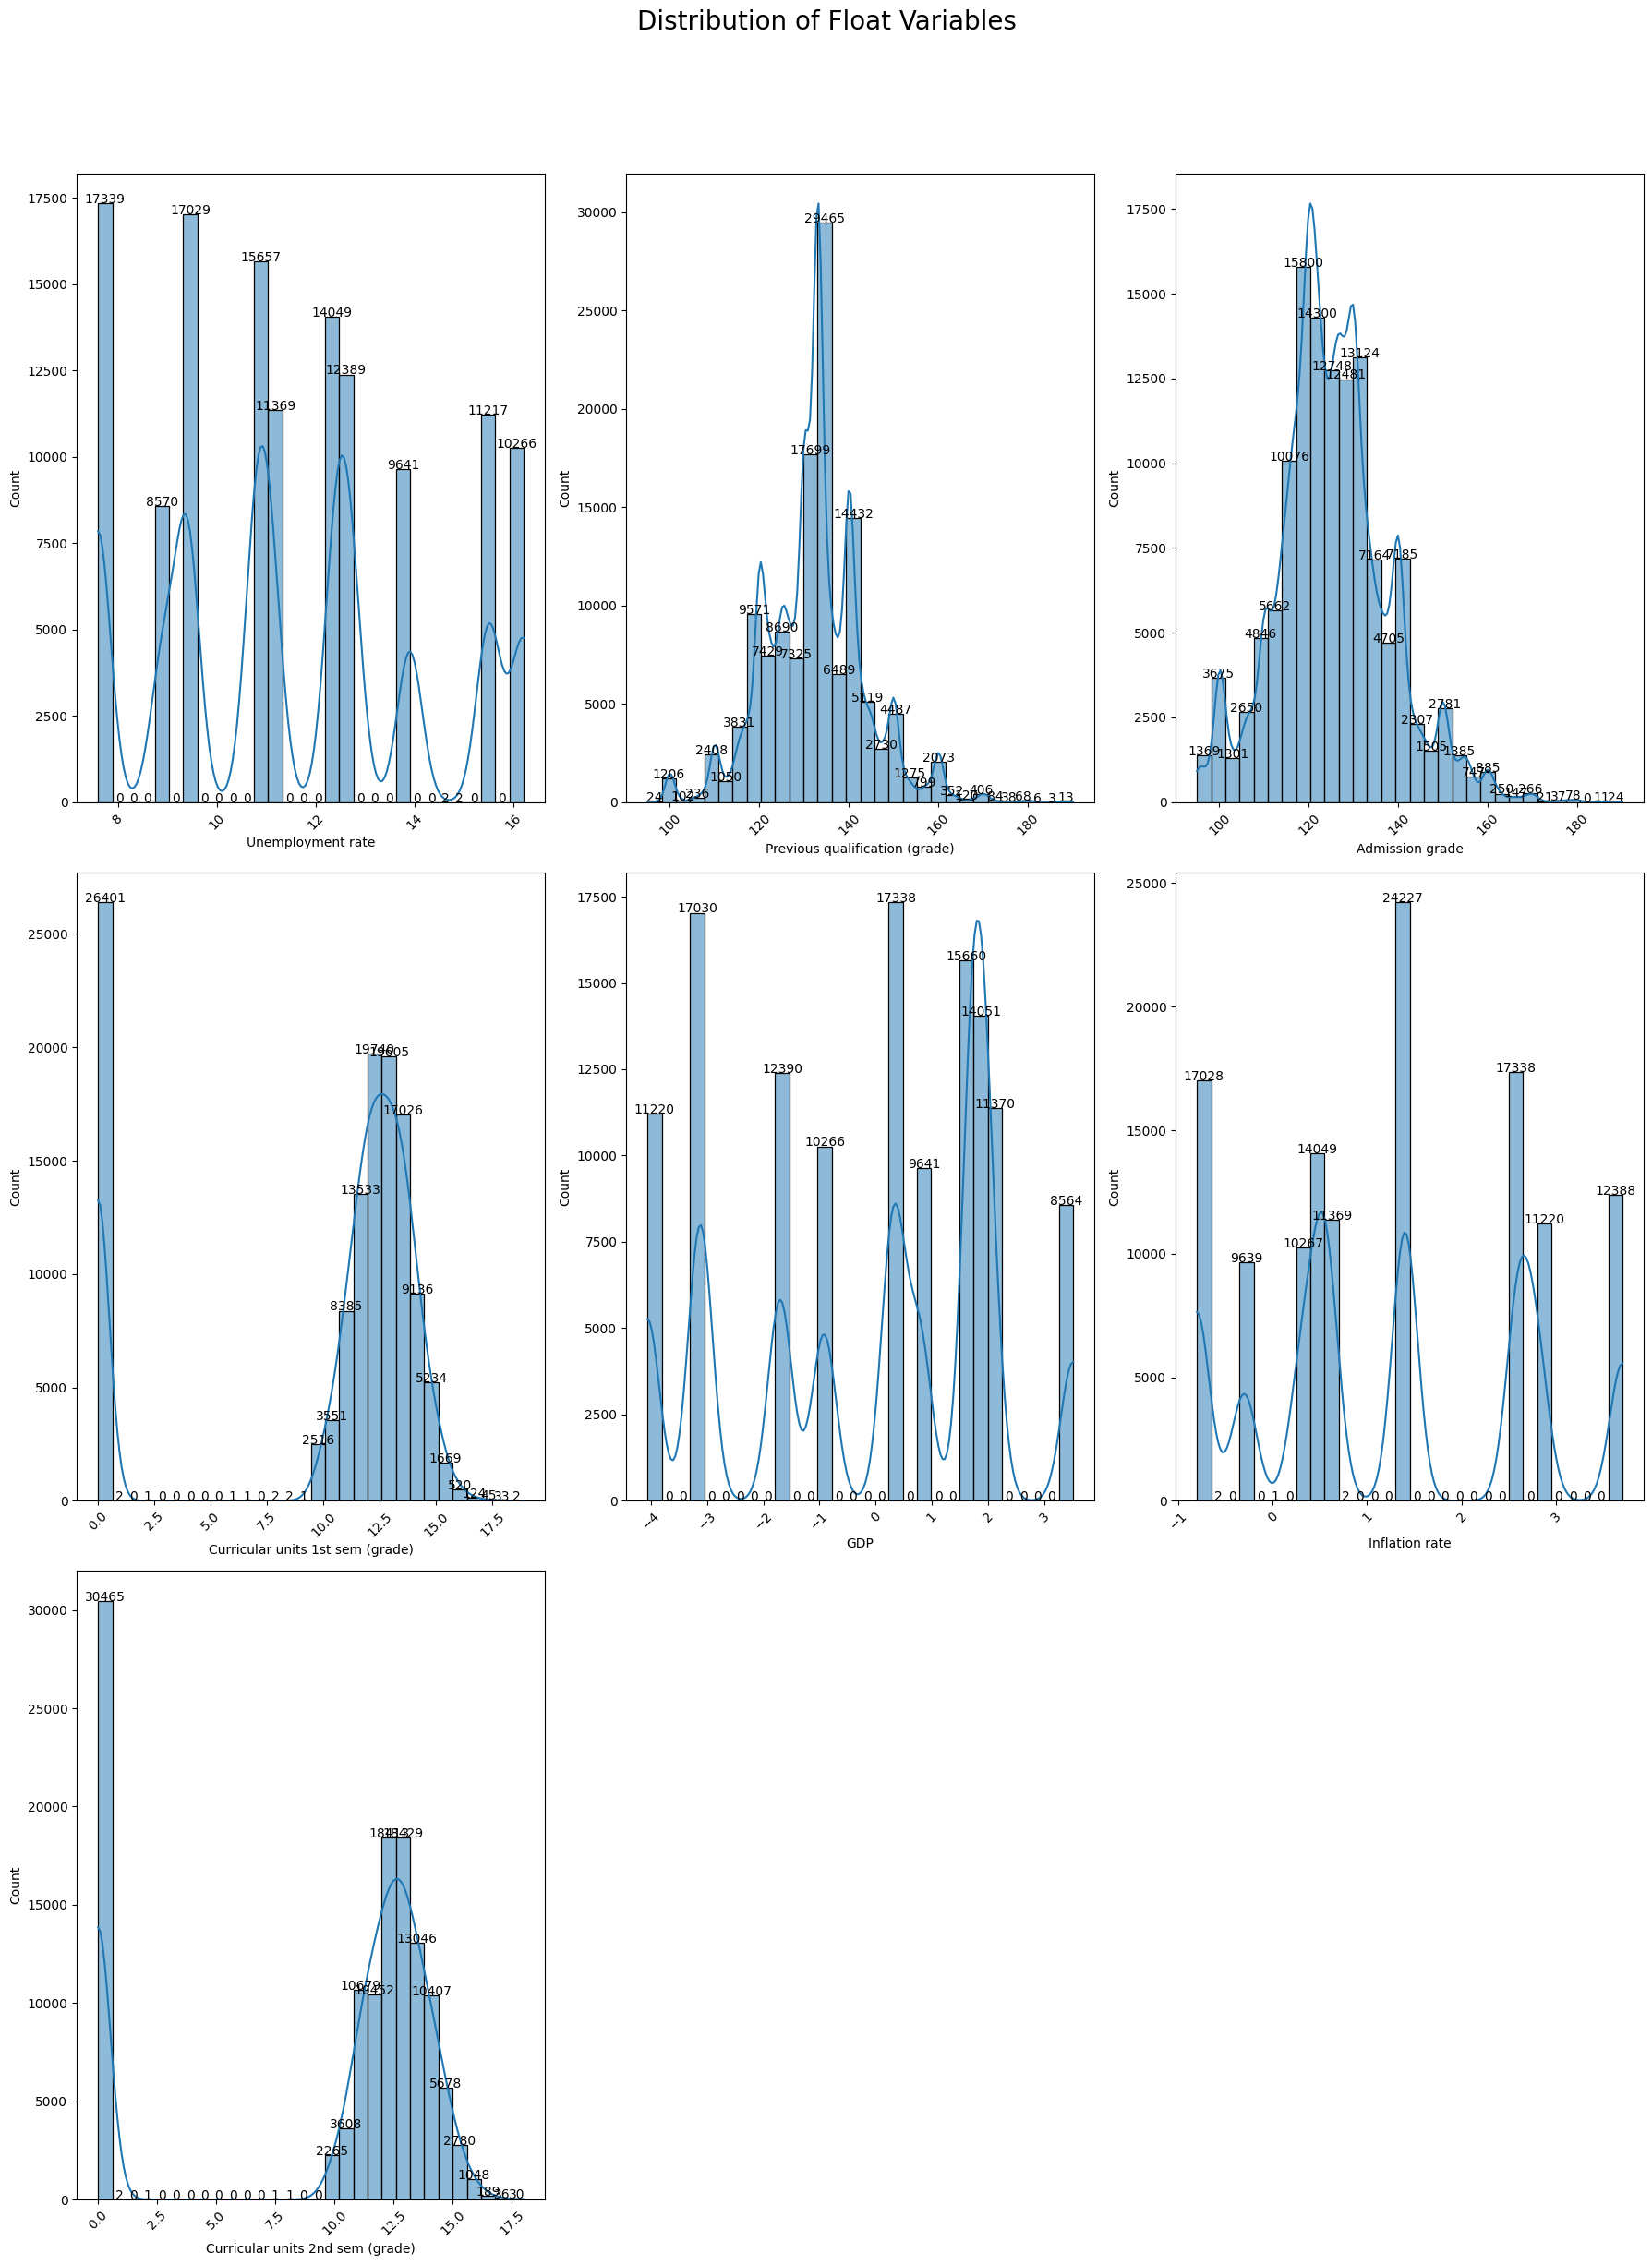

In [19]:
combined_data = pd.concat([train, test], axis=0)

num_rows = (len(combined_float_cols) + 2) // 3

plt.figure(figsize=(18, 24))
plotnumber = 1

for col in combined_float_cols:
    if plotnumber <= len(combined_float_cols):
        ax = plt.subplot(num_rows, 3, plotnumber)
        sns.histplot(combined_data[col], bins=30, kde=True, palette='pastel', ax=ax)

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")

        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.ylabel('Count')

        plotnumber += 1

plt.suptitle('Distribution of Float Variables', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Distribution of all varaibles by target

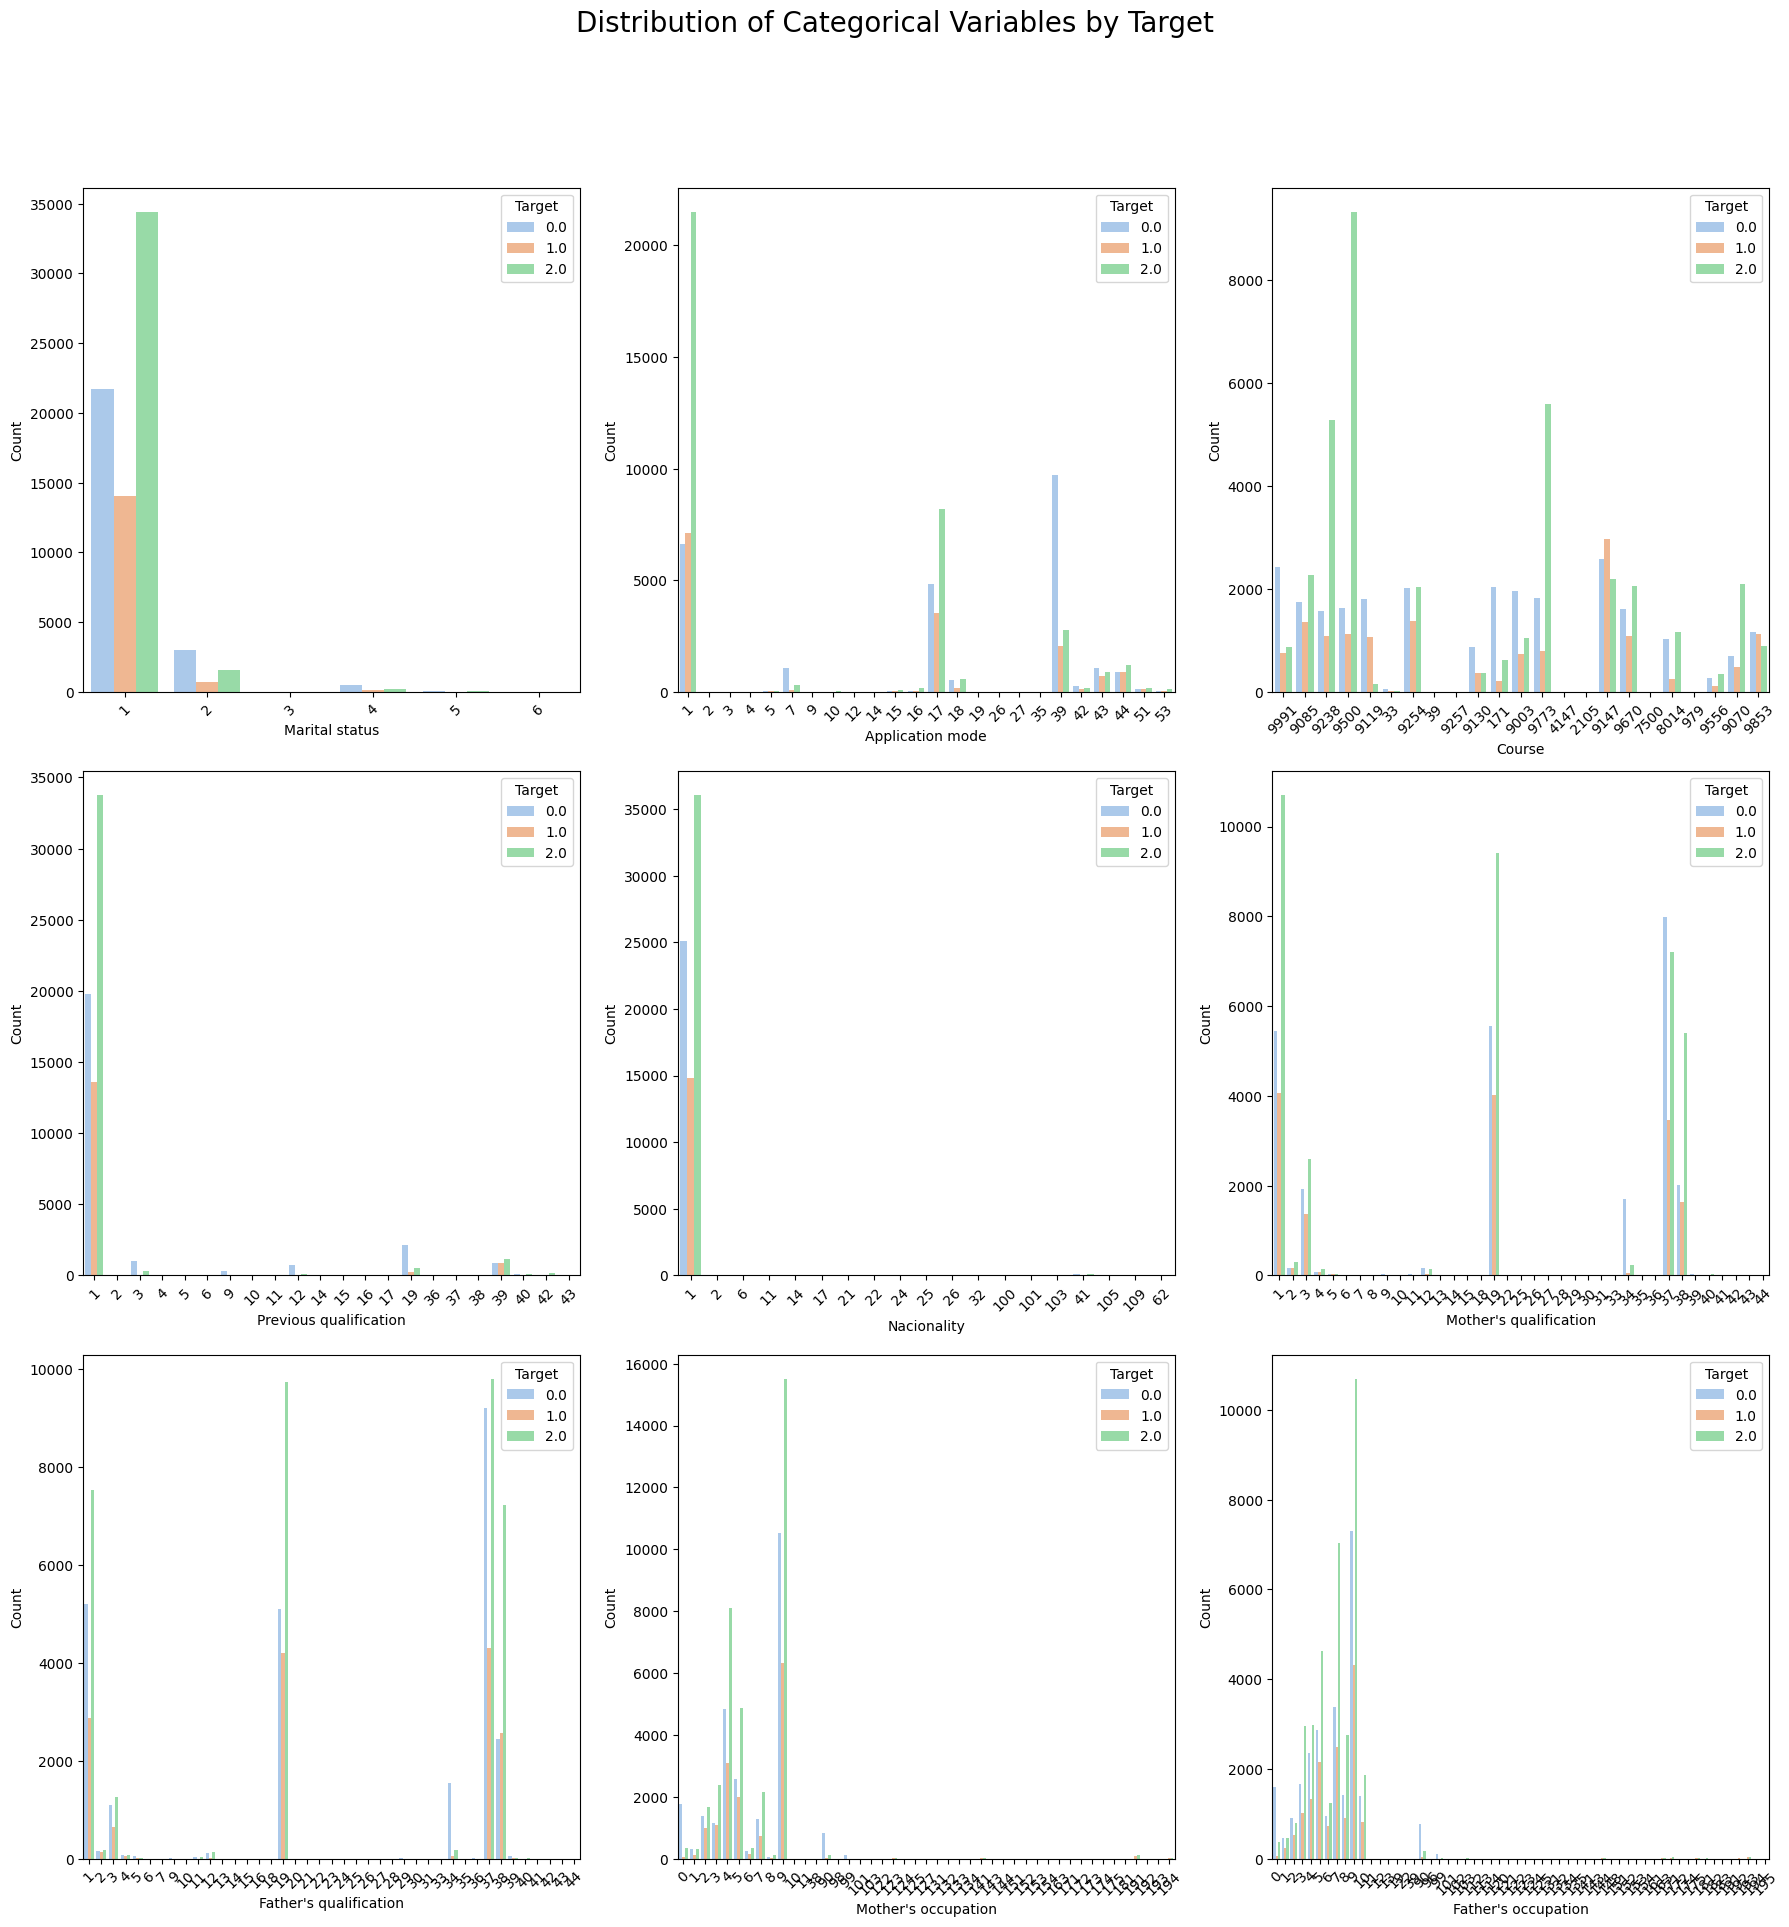

In [20]:
plt.figure(figsize=(18, 24))
plotnumber = 1


for col in cat_features:
    if plotnumber <= len(cat_features):
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=col, hue='Target', data=pd.concat([train, test]), palette='pastel', ax=ax)

        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.legend(title='Target')

        plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by Target', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

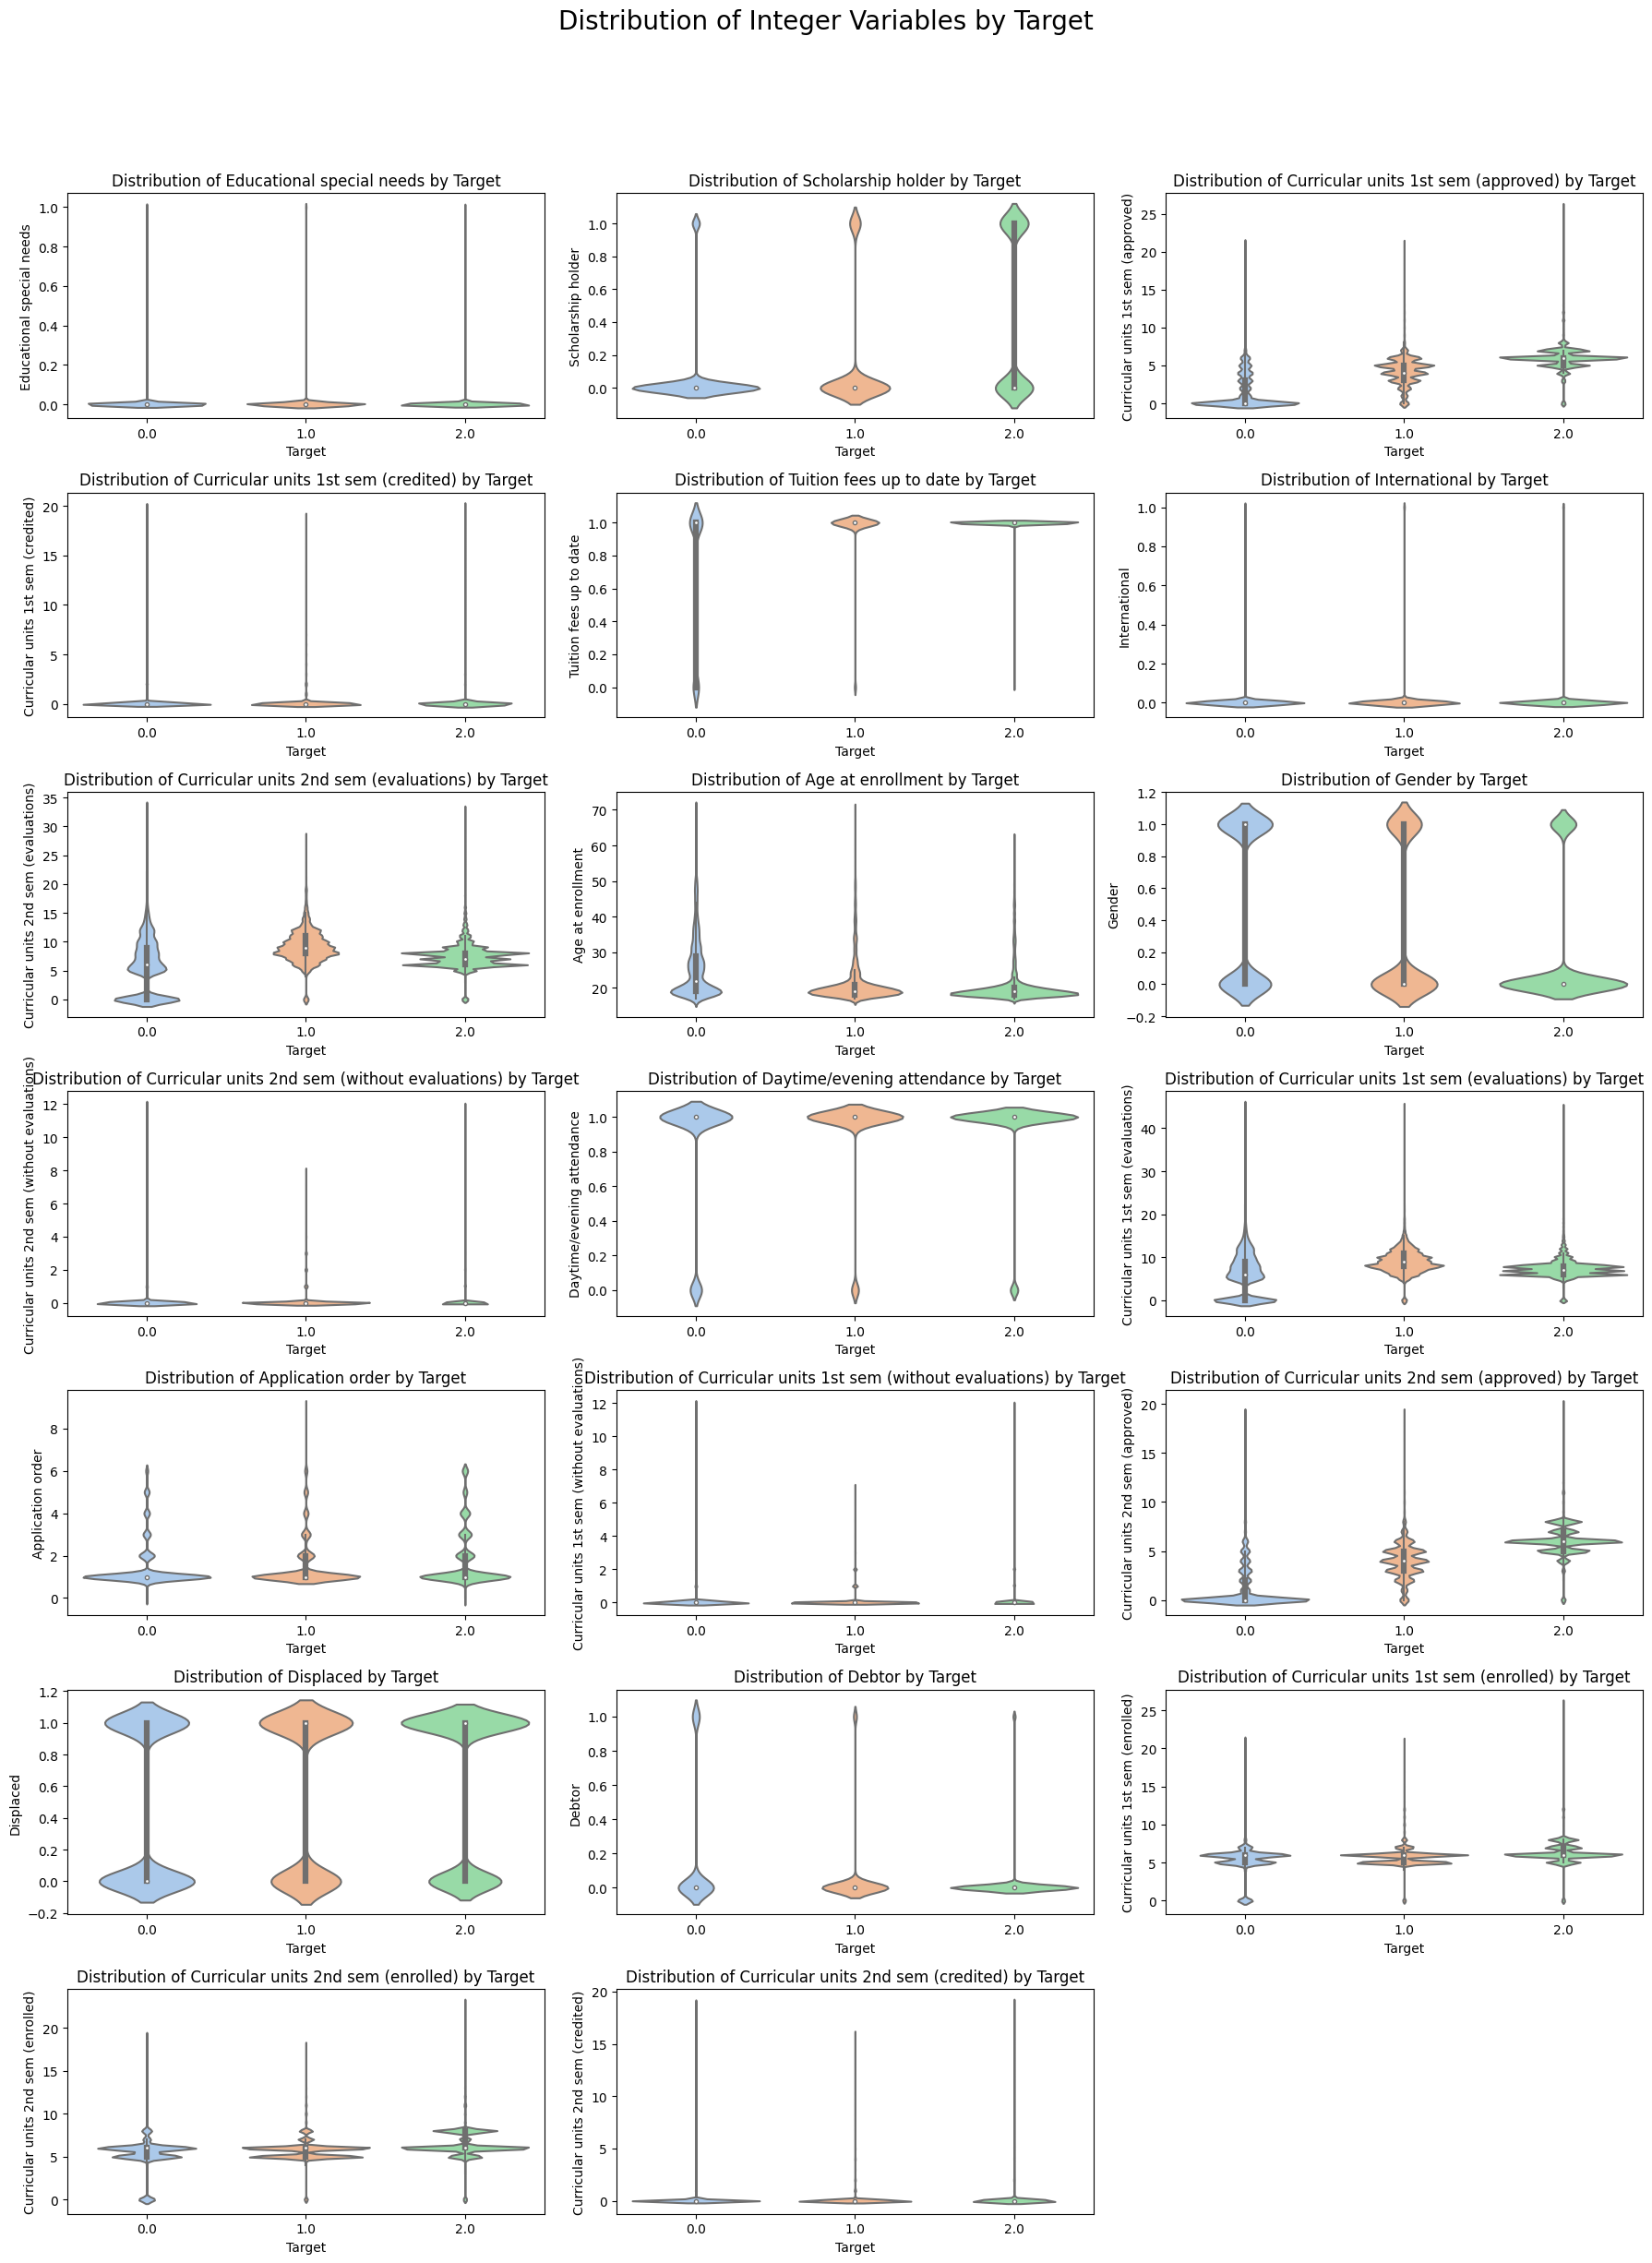

In [21]:
plt.figure(figsize=(18, 24))
plotnumber = 1

# Calculate the number of rows needed based on the number of columns
num_rows = (len(combined_int_cols) + 2) // 3

for col in combined_int_cols:
    if plotnumber <= len(combined_int_cols):

        ax = plt.subplot(num_rows, 3, plotnumber)
        sns.violinplot(x='Target', y=col, data=pd.concat([train, test]), palette='pastel', ax=ax)

        plt.xlabel('Target')
        plt.ylabel(col)
        plt.title(f'Distribution of {col} by Target')

        plotnumber += 1

plt.suptitle('Distribution of Integer Variables by Target', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

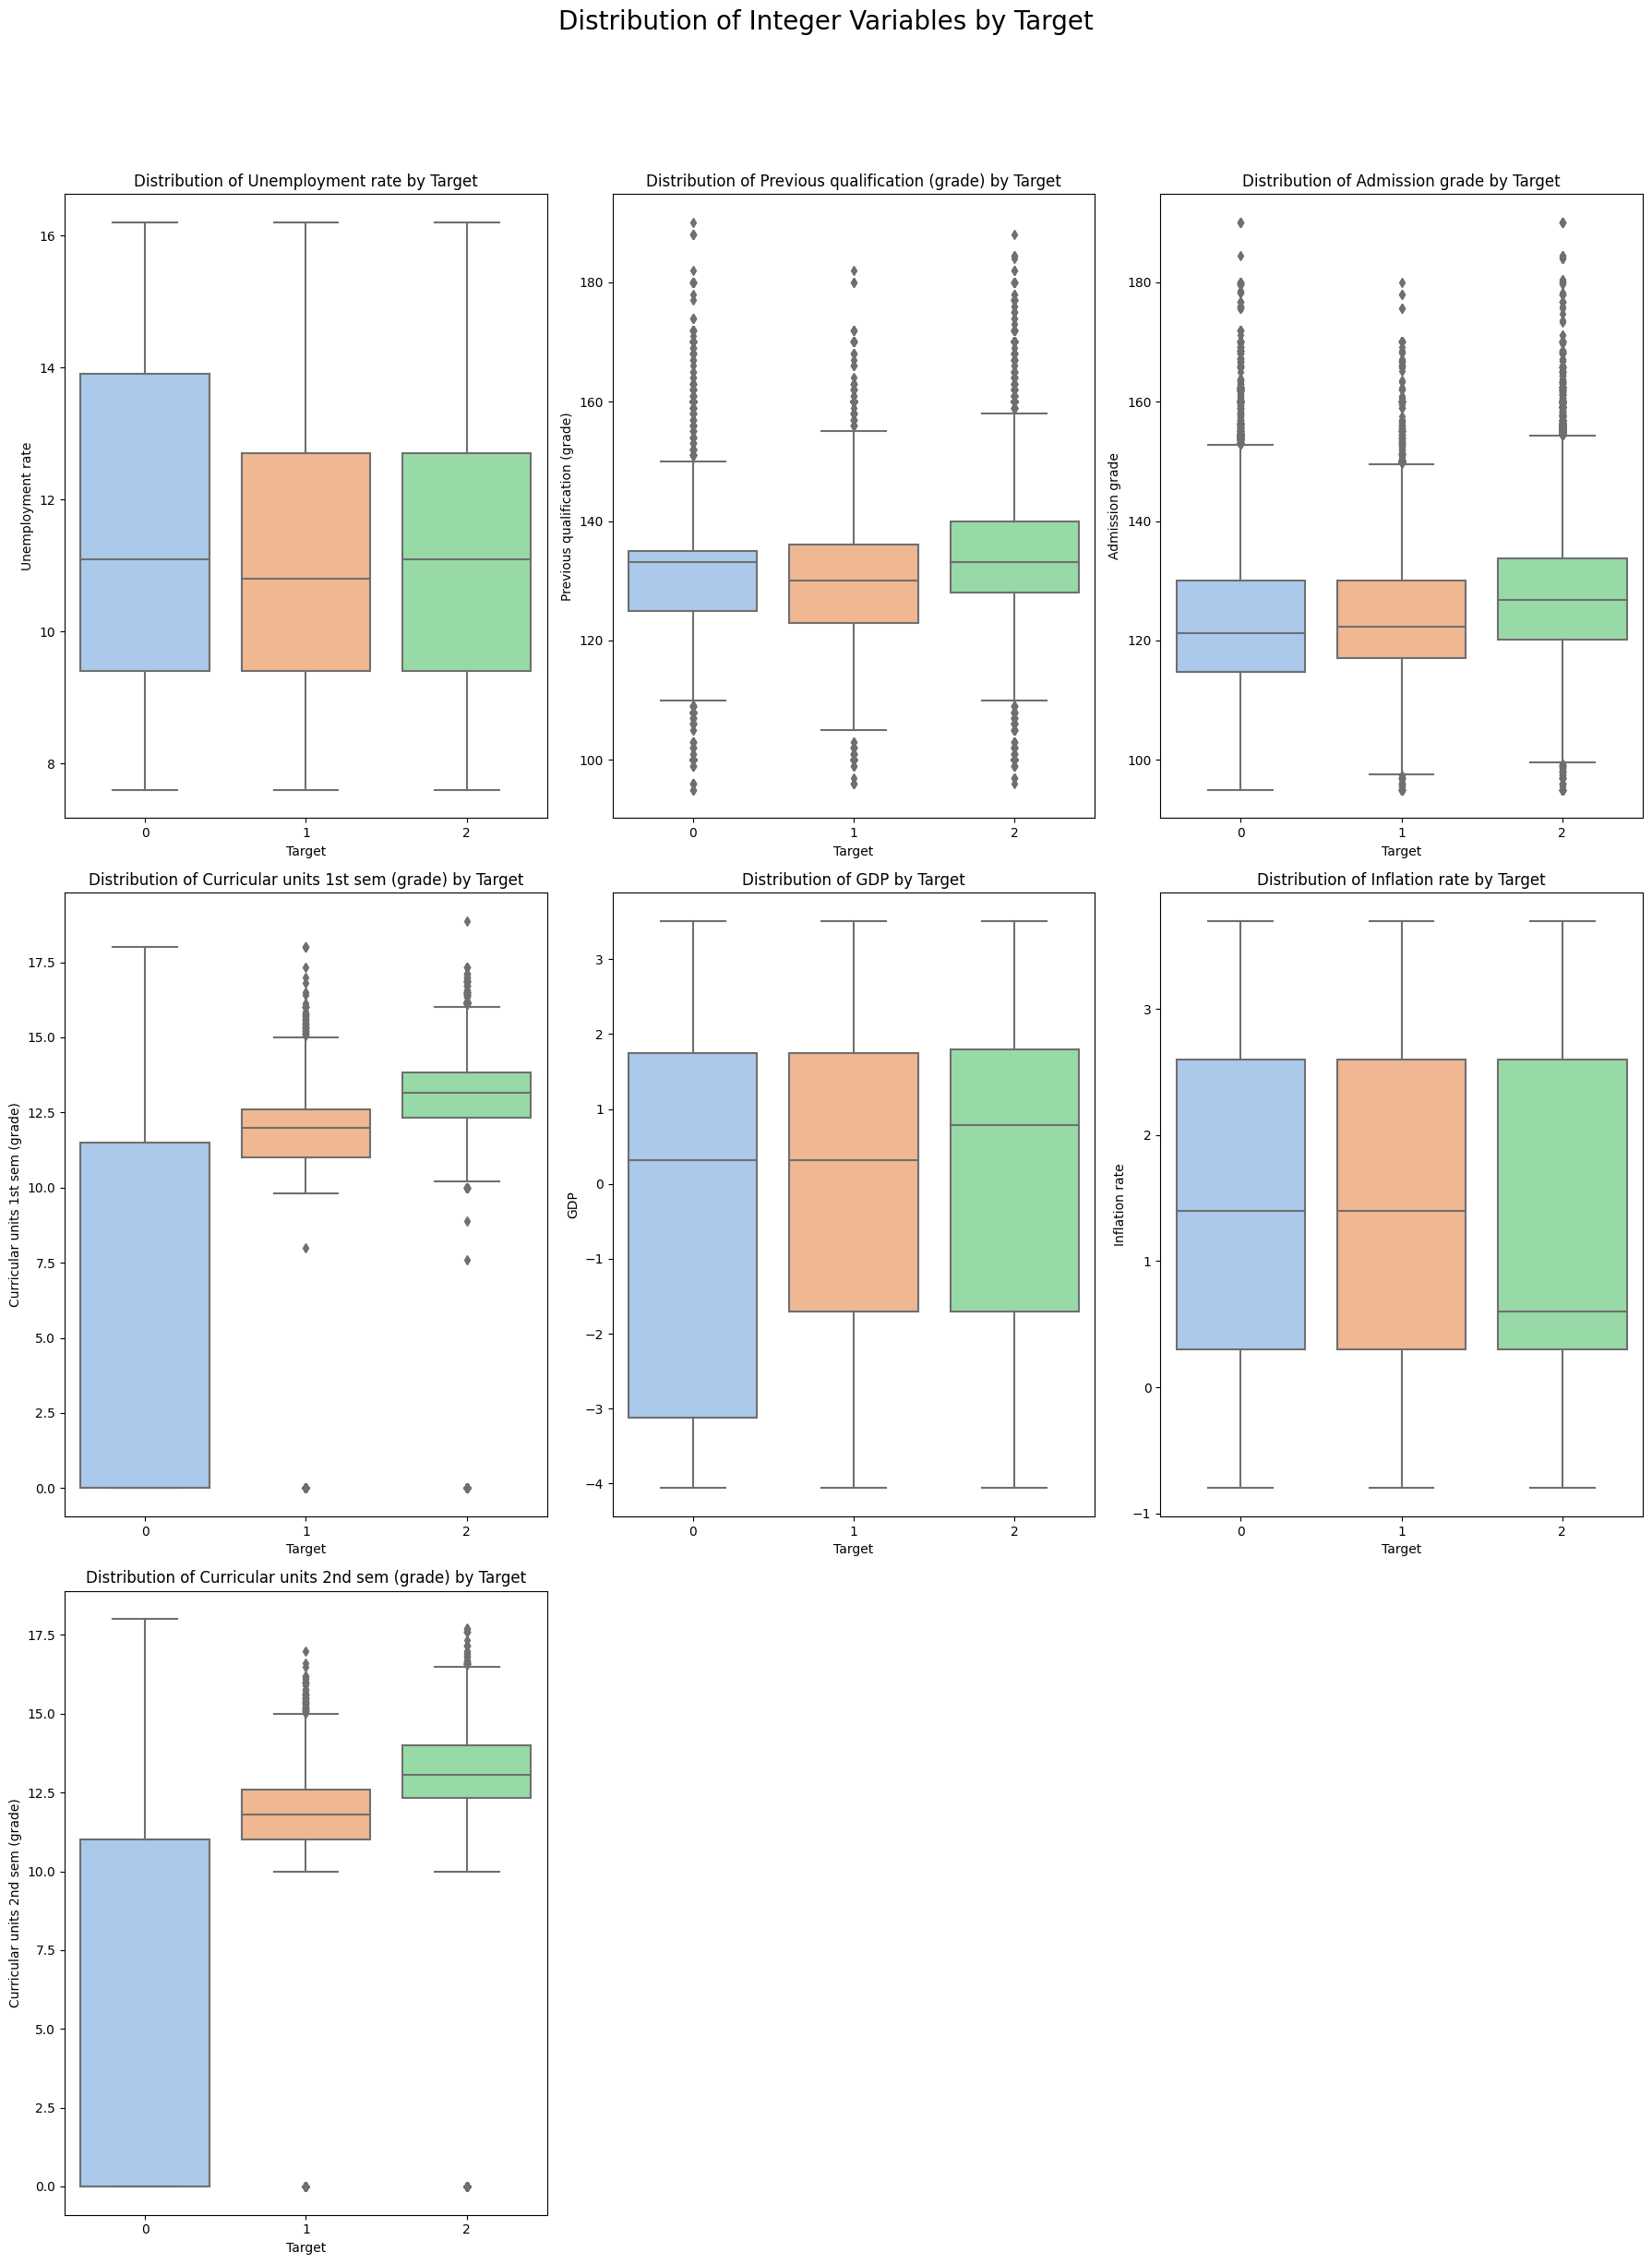

In [22]:
plt.figure(figsize=(18, 24))
plotnumber = 1

num_rows = (len(combined_float_cols) + 2) // 3

for col in combined_float_cols:
    if plotnumber <= len(combined_float_cols):
        ax = plt.subplot(num_rows, 3, plotnumber)
        sns.boxplot(x='Target', y=col, data=train, palette='pastel', ax=ax)

        plt.xlabel('Target')
        plt.ylabel(col)
        plt.title(f'Distribution of {col} by Target')

        plotnumber += 1

plt.suptitle('Distribution of Integer Variables by Target', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Correlation

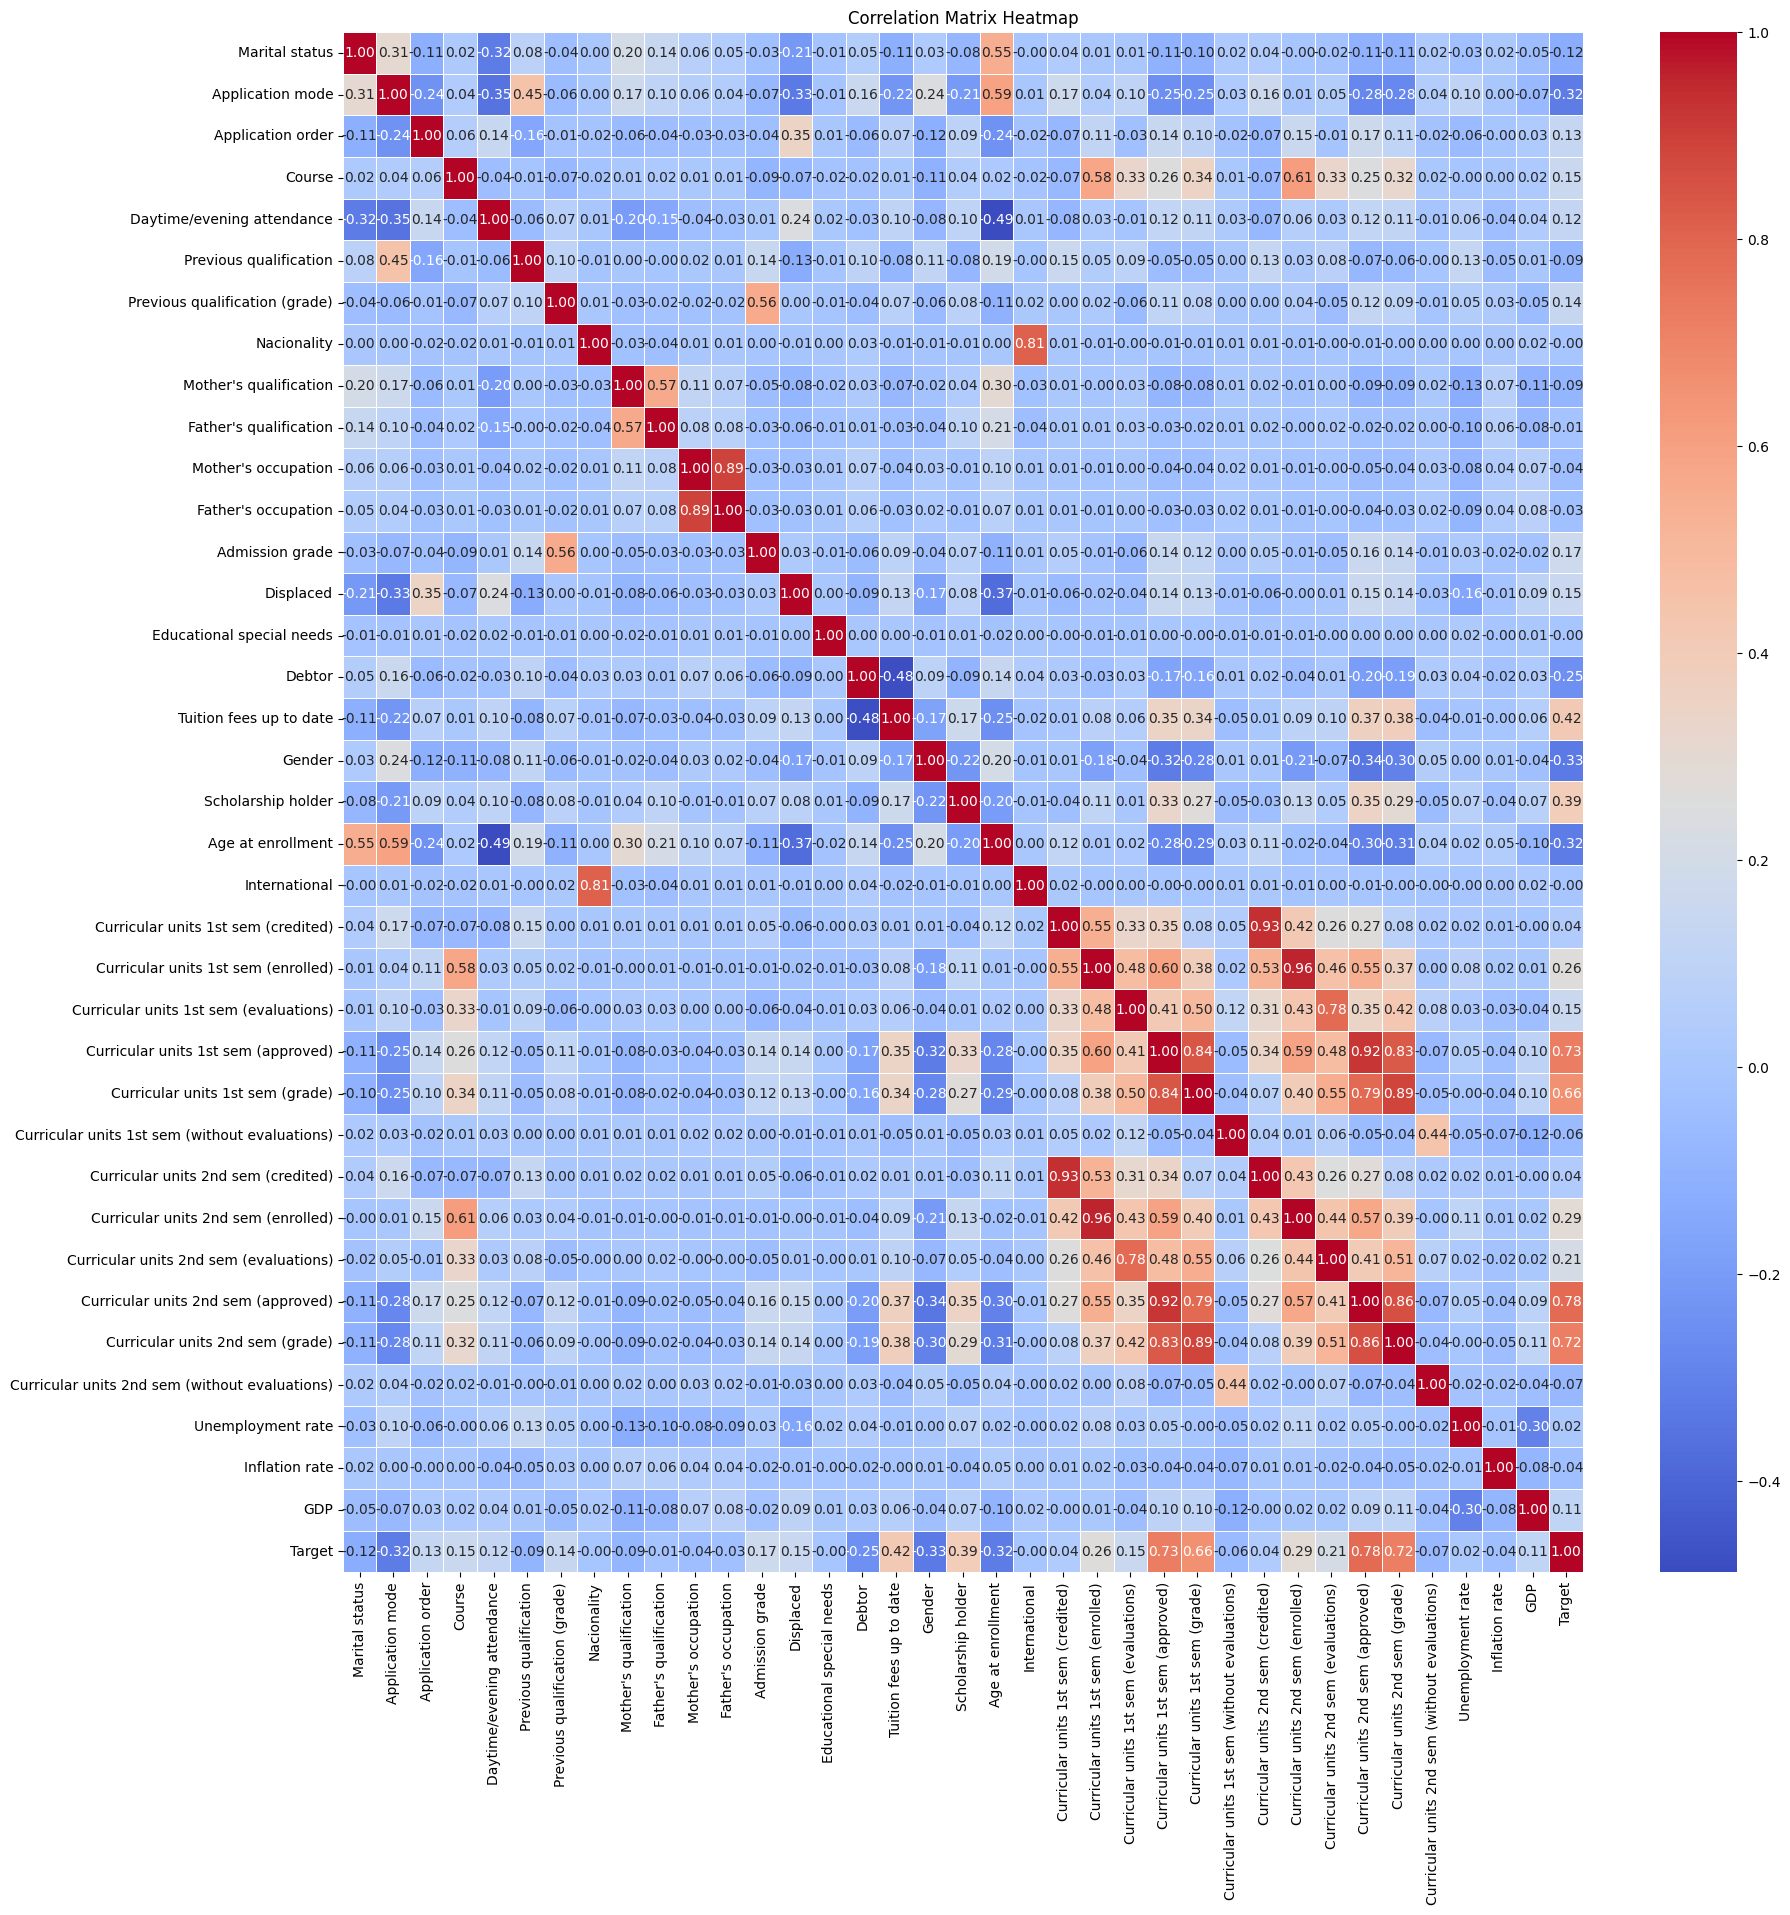

In [23]:
correlation_matrix = combined_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_train_data, train['Target'], test_size=0.2, random_state=42)

In [25]:
param_dist = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rt = RandomForestClassifier(random_state=42)


random_search = RandomizedSearchCV(estimator=rt, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)


random_search.fit(selected_train_data, train['Target'])

# Get the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Best Score: 0.8254135781144901


In [26]:
RandomForest = RandomForestClassifier(**random_search.best_params_, random_state=42)

RandomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='auto', min_samples_split=10,
                       n_estimators=400, random_state=42)

In [27]:
crossval_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

RandomForest_scores = cross_val_score(RandomForest, X_train, y_train, cv=crossval_kf, scoring='accuracy')

print(f'Cross-validation scores: {RandomForest_scores}')
print(f'Mean accuracy: {RandomForest_scores.mean():.4f}')

Cross-validation scores: [0.82479784 0.81761006 0.82863677 0.82324594 0.82282307]
Mean accuracy: 0.8234


In [28]:
RandomForest_y_pred = RandomForest.predict(selected_test_data)

test = test[selected_train_data.columns]
RandomForest_y_pred = RandomForest.predict(test)

random_forest_labels = le.inverse_transform(RandomForest_y_pred)

RandomForest_result = pd.DataFrame({'id':test.index, 'Target': random_forest_labels})
RandomForest_result.to_csv('result_RandomForest.csv', index=False)

In [29]:
AdaBoost = AdaBoostClassifier(random_state=42)

In [30]:
crossval_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

AdaBoost_scores = cross_val_score(AdaBoost, X_train, y_train, cv=crossval_kf, scoring='accuracy')

print(f'Cross-validation scores: {AdaBoost_scores}')
print(f'Mean accuracy: {AdaBoost_scores.mean():.4f}')

Cross-validation scores: [0.8174467  0.81279098 0.82373601 0.81867189 0.81432772]
Mean accuracy: 0.8174


In [31]:
AdaBoost.fit(X_train, y_train)
AdaBoost_y_pred = AdaBoost.predict(test)

AdaBoost_labels = le.inverse_transform(AdaBoost_y_pred)

AdaBoost_result = pd.DataFrame(test.index)
AdaBoost_result['Target'] = random_forest_labels
AdaBoost_result.to_csv('result_AdaBoost.csv', index=False)

In [32]:
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'merror',
    'max_depth': 20,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'enable_categorical': True
}

xgb = xgb.XGBClassifier(**params)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric='merror',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, ...)

In [33]:
crossval_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_scores = cross_val_score(xgb, X_train, y_train, cv=crossval_kf, scoring='accuracy')

print(f'Cross-validation scores: {xgb_scores}')
print(f'Mean accuracy: {xgb_scores.mean():.4f}')

Cross-validation scores: [0.82430777 0.81434289 0.82945357 0.82651311 0.82143441]
Mean accuracy: 0.8232


In [34]:
xgb_y_pred = xgb.predict(test)


xgb_labels = le.inverse_transform(xgb_y_pred)


xgb_result = pd.DataFrame({'id': test.index, 'Target': xgb_labels})
xgb_result.to_csv('result_xgb.csv', index=False)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
LogisticRegression = LogisticRegression(random_state=42)
LogisticRegression.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [37]:
crossval_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

LogisticRegression_scores = cross_val_score(LogisticRegression, X_train_scaled, y_train, cv=crossval_kf, scoring='accuracy')

print(f'Cross-validation scores: {LogisticRegression_scores}')
print(f'Mean accuracy: {LogisticRegression_scores.mean():.4f}')

Cross-validation scores: [0.81703831 0.80911541 0.81573144 0.81532304 0.80918151]
Mean accuracy: 0.8133


In [38]:
LogisticRegression_y_pred = LogisticRegression.predict(test)


LogisticRegression_labels = le.inverse_transform(LogisticRegression_y_pred)


LogisticRegression_result = pd.DataFrame({'id': test.index, 'Target': LogisticRegression_labels})

LogisticRegression_result.to_csv('result_LogisticRegression.csv', index=False)

In [39]:
print(len(X_test_scaled))

15304


In [40]:
svc = SVC(kernel='rbf', random_state=42)

svc.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [41]:
crossval_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svc_scores = cross_val_score(svc, X_train_scaled, y_train, cv=crossval_kf, scoring='accuracy')

print(f'Cross-validation scores: {svc_scores}')
print(f'Mean accuracy: {svc_scores.mean():.4f}')

Cross-validation scores: [0.81932533 0.80985053 0.82120395 0.82046884 0.8167783 ]
Mean accuracy: 0.8175


In [42]:
svc_y_pred = svc.predict(test)


svc_labels = le.inverse_transform(svc_y_pred)


svc_result = pd.DataFrame({'id': test.index, 'Target': svc_labels})


svc_result.to_csv('result_svc.csv', index=False)

In [43]:
data = {
    'Model': ['RandomForest', 'AdaBoost', 'XGBoost', 'xgb', 'LogisticRegression', 'svc'],
    'Score': [RandomForest_scores.mean(), AdaBoost_scores.mean(),
              xgb_scores.mean(), LogisticRegression_scores.mean(), svc_scores.mean()]
}

data['Score'].append(xgb_scores.mean())

accuracy_sorted = pd.DataFrame(data)

In [44]:
fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score')
fig.update_layout(width=600, height=500)
fig.show()

#Feature Importance

In [45]:
def plot_feature_importances(model, model_name, dataset_name, X_train):
    """
    Plots feature importances for a given model.

    Args:
        model: The trained model.
        model_name: Name of the model.
        dataset_name: Name of the dataset.
        X_train: The training data.

    Returns:
        A matplotlib figure.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances ({model_name} - {dataset_name})")
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    return plt.gcf()





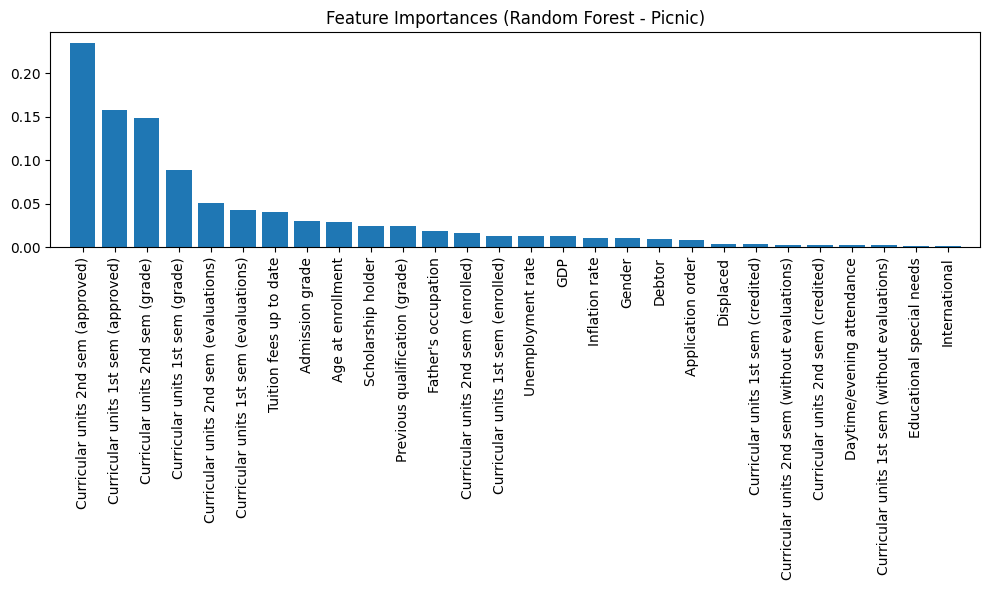

In [46]:
model_name = 'Random Forest'
fig = plot_feature_importances(RandomForest, model_name, 'Picnic', X_train)
fig.show()

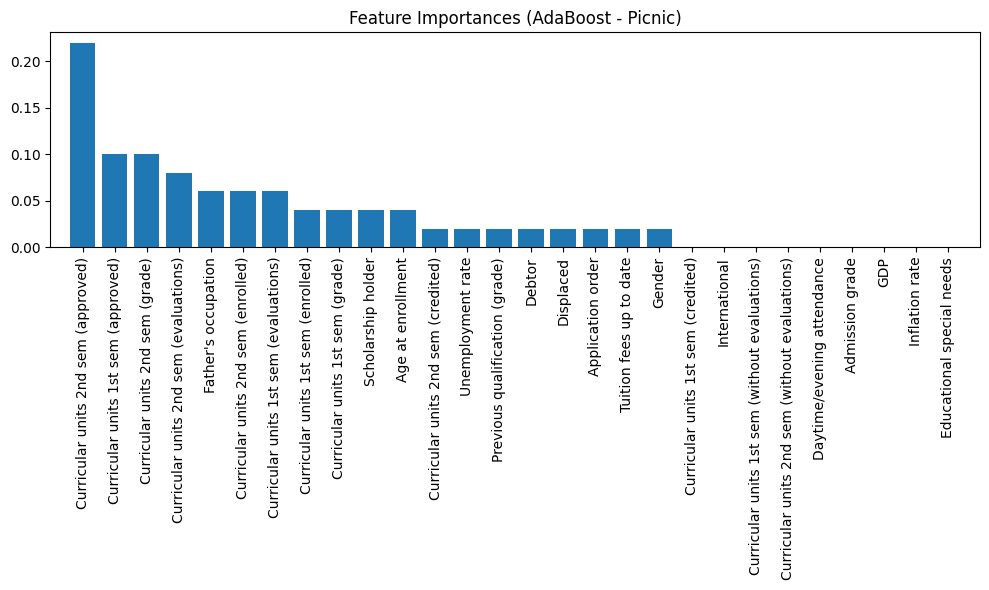

In [47]:
model_name = 'AdaBoost'

AdaBoost.fit(X_train, y_train)

fig = plot_feature_importances(AdaBoost, model_name, 'Picnic', X_train)
fig.show()

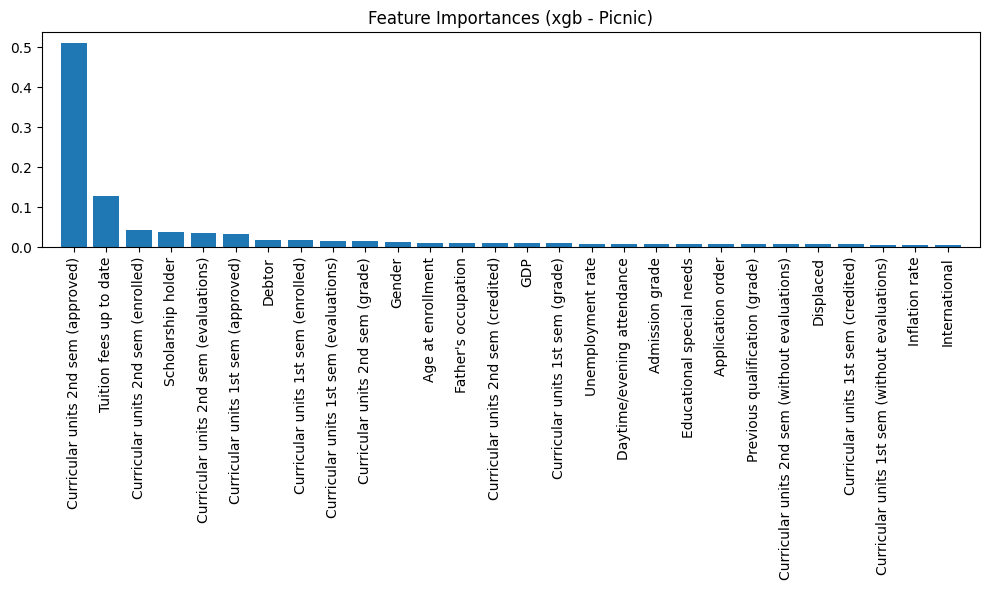

In [48]:
model_name = 'xgb'
model = XGBClassifier(enable_categorical=True)
model.fit(X_train, y_train)
fig = plot_feature_importances(model, model_name, 'Picnic', X_train)
fig.show()


Logistic regression and SVC do not feature impotance attributes